In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
def split_mean_std(dataframe):
    mean_df = dataframe.copy()
    std_df = dataframe.copy()

    for col in dataframe.columns:
        if col != 'index':
            mean_df[col] = dataframe[col].apply(lambda x: float(x.split(' ± ')[0]))
            std_df[col] = dataframe[col].apply(lambda x: float(x.split(' ± ')[1]))

    return mean_df,std_df

In [17]:
real_datalist = ["banknote",
            "california","climate_model_crashes","concrete_compression",
           "qsar_biodegradation","wine_quality_red", "connectionist_bench_sonar","wine_quality_white",
            "yacht_hydrodynamics","yeast"
            ]
#missingtypelist = ["logistic"]
# missingtypelist = ["quantile"]
# index = 12
missingtypelist = ["mar"]
index = 0
modellist = ["random", "zero", "mean", "knn", "mf", "mice", "missforest", "XGB", "ot", "hyper", "gain", "miwae", "notmiwae", "tabcsdi"]
for missing_type in missingtypelist:
    train_list = []
    test_list = []
    df_name = []
    for dataname in real_datalist:
        train_df = pd.DataFrame()
        test_df = pd.DataFrame()
        for model in modellist:
            path = f"../results/{missing_type}/{dataname}"
            try:
                data = pd.read_csv(f"{path}/{model}/{missing_type}_RMSE.csv",index_col=0)
                #train_df[f'{model}'] = data['train_rmse_mean'].map('{:.5f}'.format) + ' ± ' + data['train_rmse_std'].map('{:.3f}'.format)
                test_df[f'{model}'] = data['test_rmse_mean'].map('{:.5f}'.format) 
            except:
                train_df[f'{model}'] = '0 ± 0'
                test_df[f'{model}'] = '0 ± 0'


        df_name.append(dataname)
        test_list.append(test_df.iloc[index])
 
    test_df_all = pd.DataFrame(test_list,index = df_name)
    new_row_names = ["Bank", "Cali", "Climate", "Concre", "Qsar", "Red", "Sonar", "White", "Yacht", "Yeast"]
    new_col_names = ["RD", "ZR", "Mean", "KNN", "MF", "Mice", "MisF", "XGB", "OT", "HI", "GAIN", "Mi", "NMi", "CSDI"]

    # Rename rows and columns
    test_df_all = test_df_all.rename(index=dict(zip(test_df_all.index, new_row_names)), columns=dict(zip(test_df_all.columns, new_col_names)))

    # Save the modified DataFrame to a CSV file
    test_df_all.to_csv(f"../rmse/{missing_type}_{test_df.index[index]}_RMSE_test.csv")

    
    #print(test_df_all)

In [ ]:
##

## ML tasks

In [25]:
real_datalist = ["banknote",
            "california","climate_model_crashes","concrete_compression",
           "qsar_biodegradation","wine_quality_red" "connectionist_bench_sonar","wine_quality_white",
            "yacht_hydrodynamics","yeast"
            ]

rmse_data = ["california","concrete_compression",
            "wine_quality_red","wine_quality_white",
            "yacht_hydrodynamics"
            ]
f1_data = ["banknote",
            "climate_model_crashes",
            "qsar_biodegradation","connectionist_bench_sonar",
            "yeast"
            ]

#missingtypelist = ["logistic"]
missingtypelist = ["diffuse","logistic"]
#missingtypelist = ["quantile"]
index = 6
modellist = ["random", "zero", "mean", "knn", "mf", "mice", "missforest", "XGB", "ot", "hyper", "gain", "miwae", "notmiwae", "tabcsdi"]

for missing_type in missingtypelist:
    for i in range(3):
        train_list = []
        test_list = []
        df_name = []
        train_df = pd.DataFrame()
        test_df = pd.DataFrame()
        for dataname in rmse_data:
            if dataname in ["concrete_compression",
            "wine_quality_white","wine_quality_red",
            "california","yacht_hydrodynamics"
            ]:
                task_type = "rmse"
            else:
                task_type = "f1"

            for model in modellist:
                path = f"../results/{missing_type}/{dataname}"

                data = pd.read_csv(f"{path}/{model}/{missing_type}_ML_{task_type}_{i}.csv",index_col=0)
                test_df[f'{model}'] = data[f'test_ML_{task_type}_mean'].map('{:.5f}'.format) 
                #print(test_df.index)

            df_name.append(dataname)

            test_list.append(test_df.iloc[index])

        test_df_all = pd.DataFrame(test_list,index = df_name)

        new_row_names = ["Bank", "Cali", "Climate", "Concre", "Qsar", "Red", "Sonar", "White", "Yacht", "Yeast"]
        new_col_names = ["RD", "ZR", "Mean", "KNN", "MF", "Mice", "MisF", "XGB", "OT", "HI", "GAIN", "Mi", "NMi", "CSDI"]

        # Rename rows and columns
        test_df_all = test_df_all.rename(index=dict(zip(test_df_all.index, new_row_names)), columns=dict(zip(test_df_all.columns, new_col_names)))

        test_df_all.to_csv(f"../results/output_ml/{missing_type}_{test_df.index[index]}_ML_{task_type}_test_{i}.csv")

In [3]:


sort_list = ["bank","cali","climate","concrete","qsar","red","sonar","white","yacht","yeast"]



Sorted real_datalist: ['banknote', 'california', 'climate_model_crashes', 'concrete_compression', 'connectionist_bench_sonar', 'qsar_biodegradation', 'wine_quality_red', 'wine_quality_white', 'yacht_hydrodynamics', 'yeast']
Sorted rmse_data: ['california', 'concrete_compression', 'wine_quality_red', 'wine_quality_white', 'yacht_hydrodynamics']
Sorted f1_data: ['banknote', 'climate_model_crashes', 'connectionist_bench_sonar', 'qsar_biodegradation', 'yeast']
Sorted f1_data: ['bank', 'cali', 'climate', 'concrete', 'qsar', 'red', 'sonar', 'white', 'yacht', 'yeast']


## Ranking

In [ ]:
real_datalist = ["banknote",
            "california","climate_model_crashes","concrete_compression",
           "qsar_biodegradation","wine_quality_red", "connectionist_bench_sonar","wine_quality_white",
            "yacht_hydrodynamics","yeast"
            ]
#missingtypelist = ["logistic"]
# missingtypelist = ["quantile"]
# index = 12
missingtypelist = ["mar"]
index = 0
modellist = ["random", "zero", "mean", "knn", "mf", "mice", "missforest", "XGB", "ot", "hyper", "gain", "miwae", "notmiwae", "tabcsdi"]
new_row_names = ["Bank", "Cali", "Climate", "Concre", "Qsar", "Red", "Sonar", "White", "Yacht", "Yeast"]
new_col_names = ["RD", "ZR", "Mean", "KNN", "MF", "Mice", "MisF", "XGB", "OT", "HI", "GAIN", "Mi", "NMi", "CSDI"]



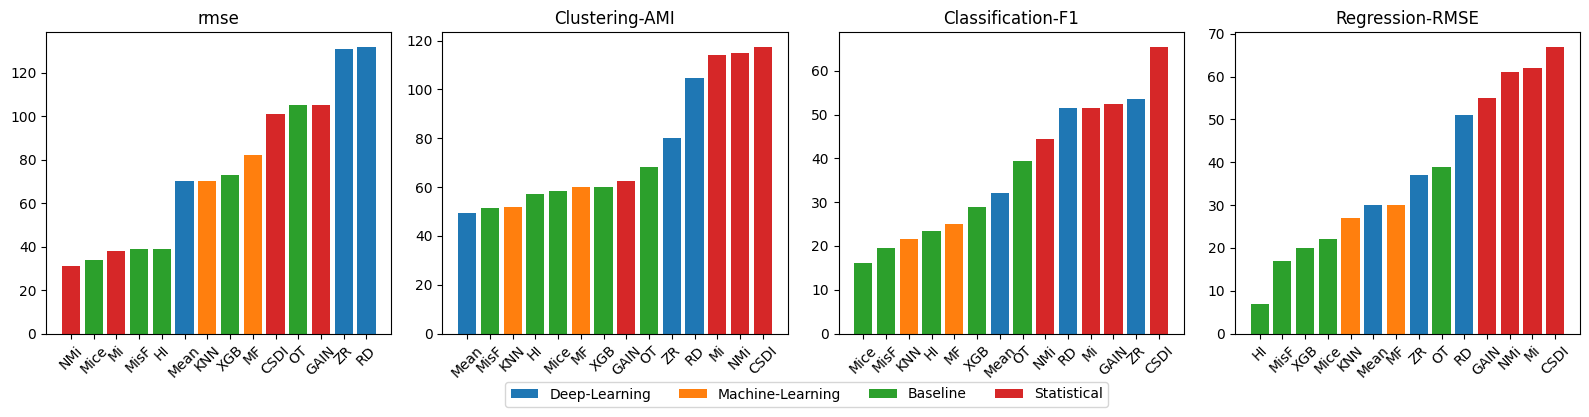

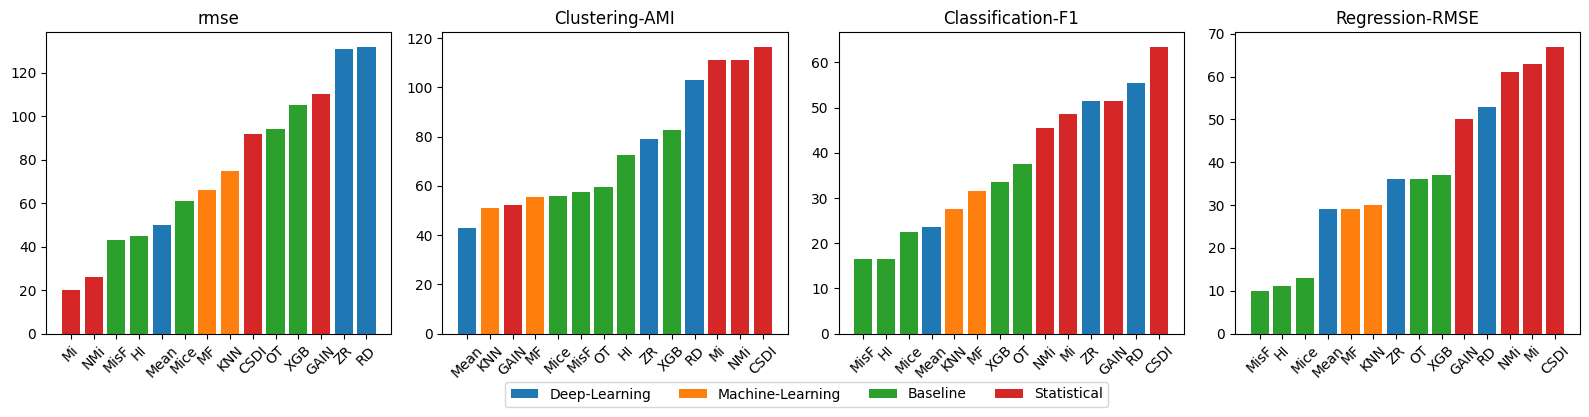

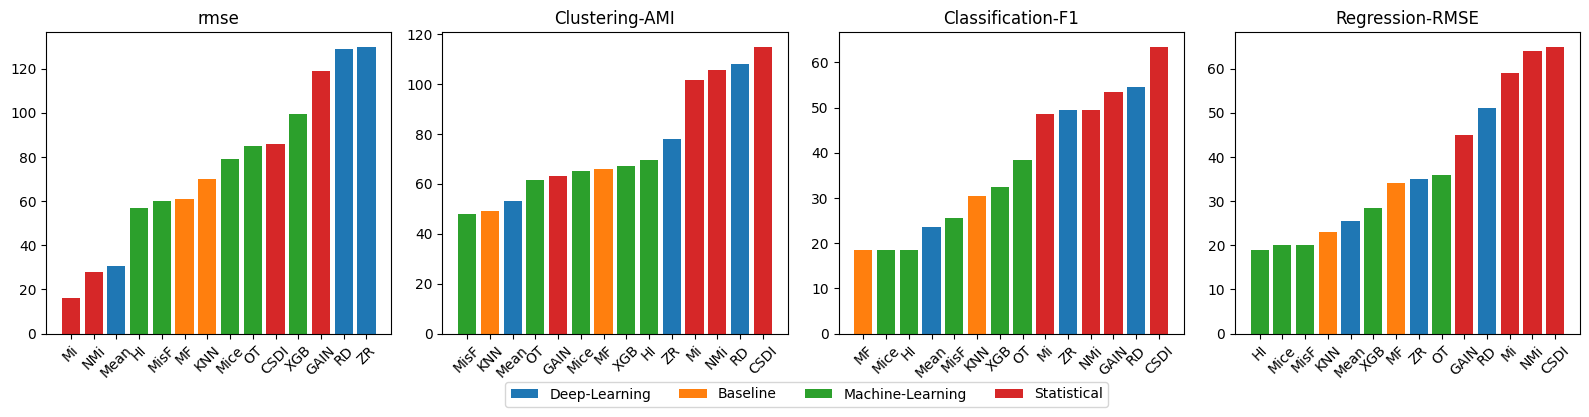

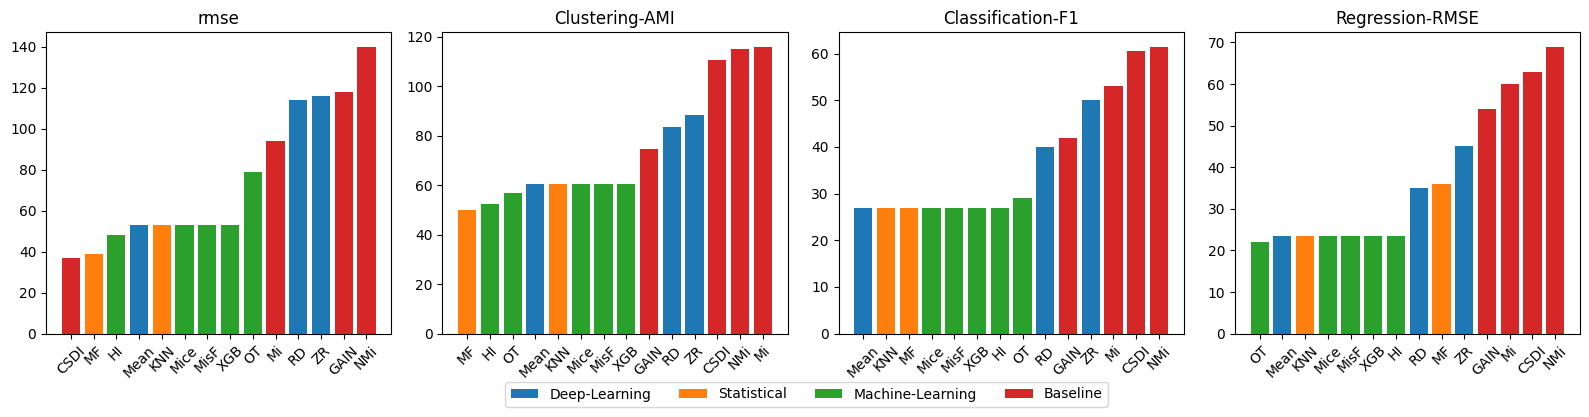

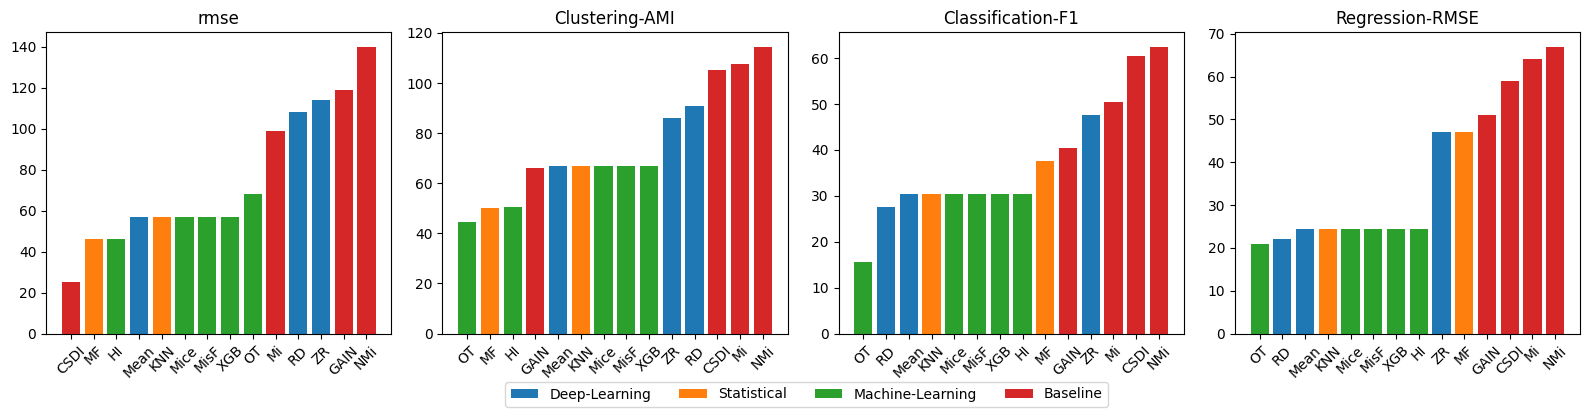

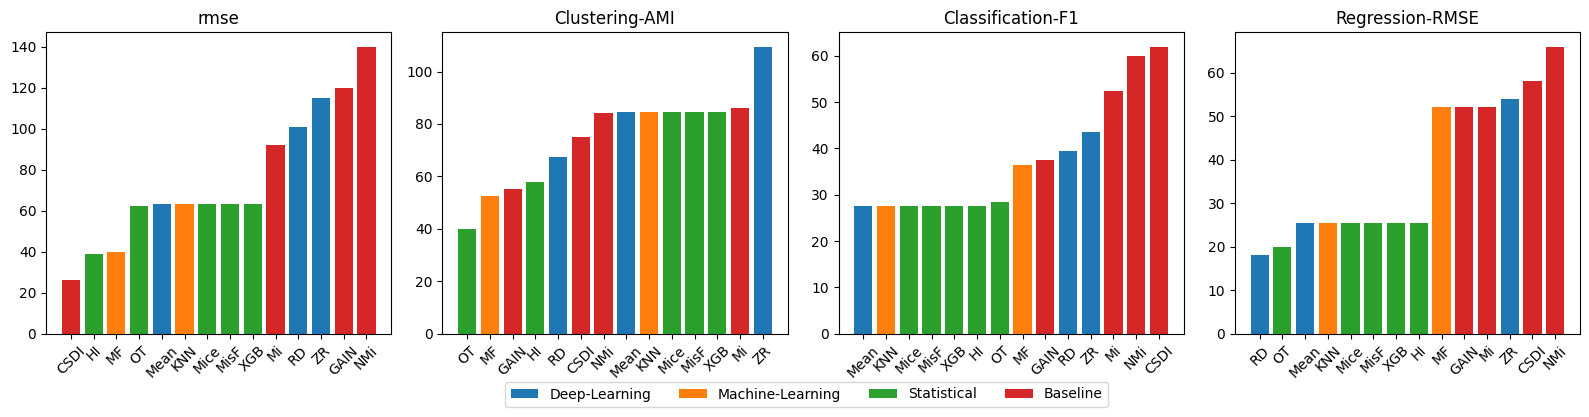

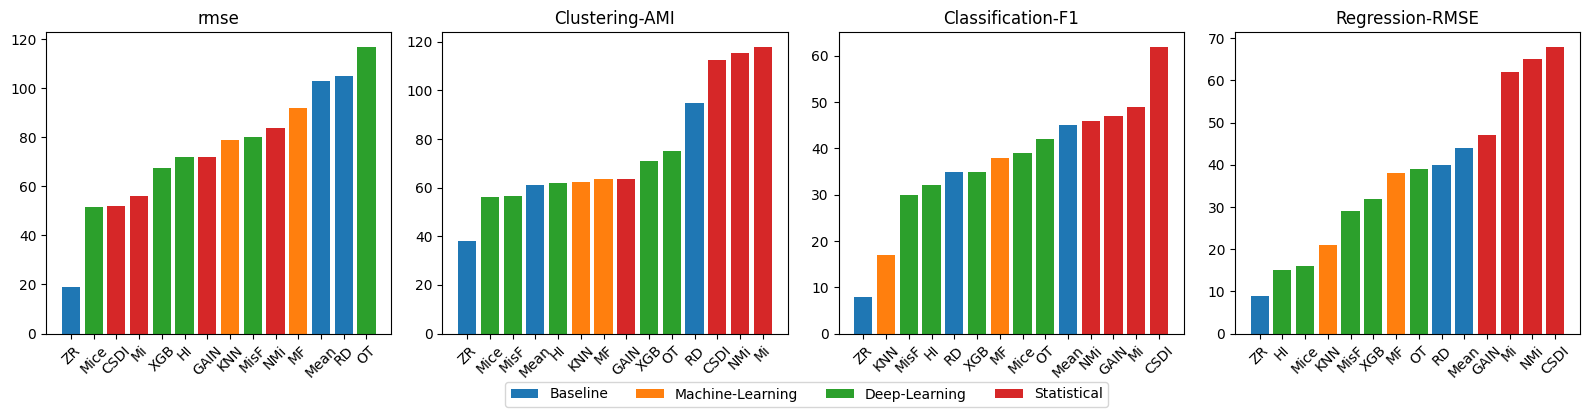

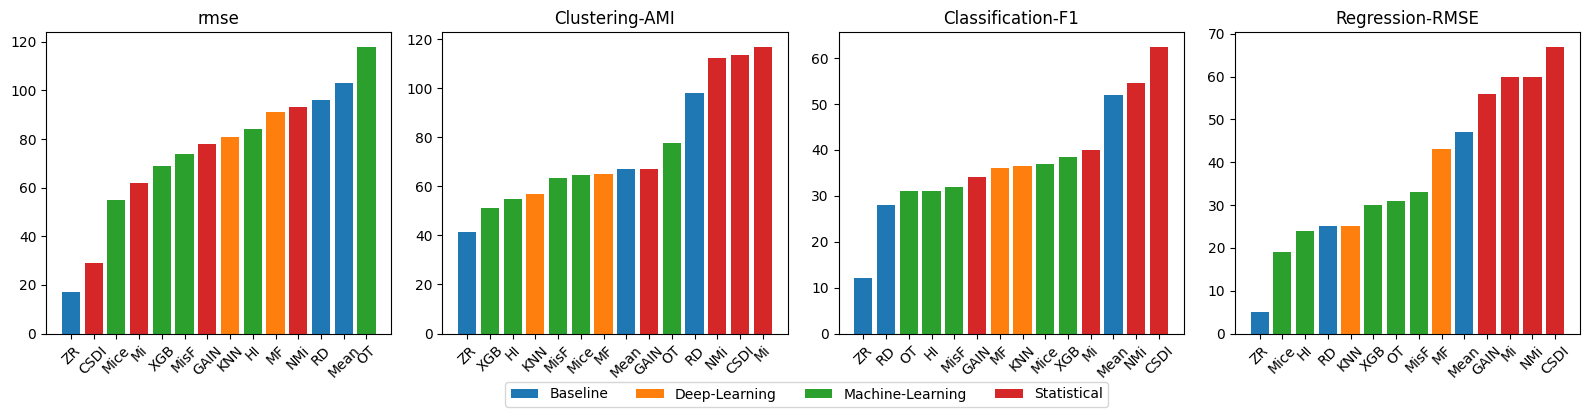

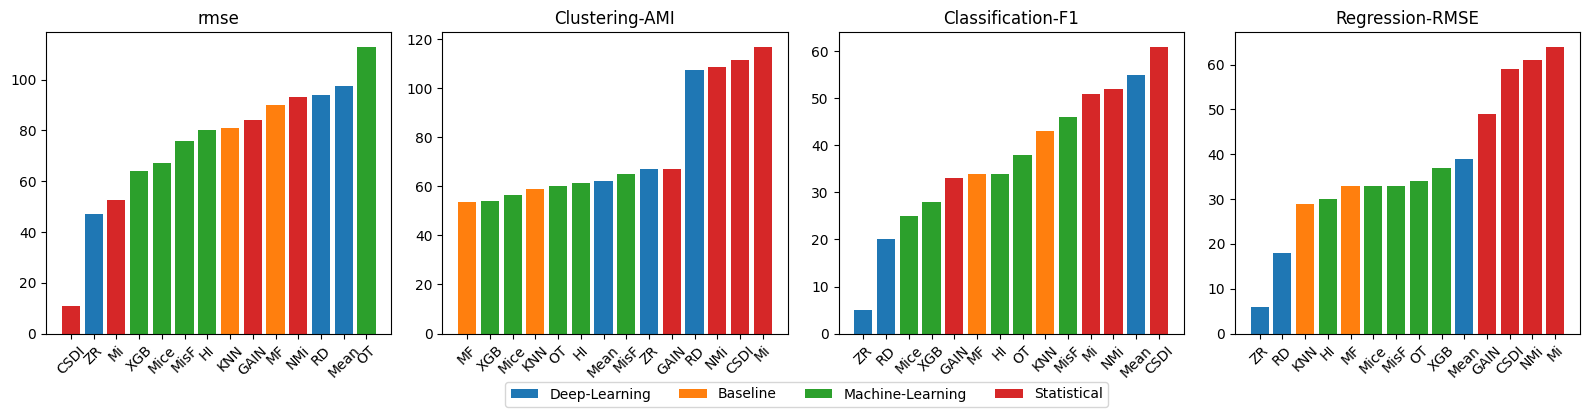

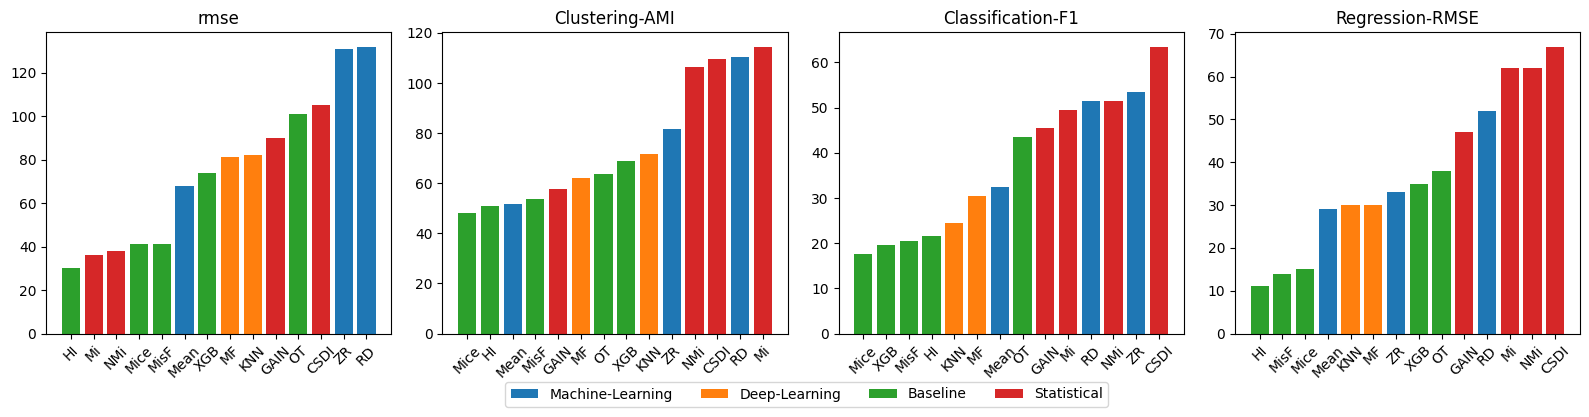

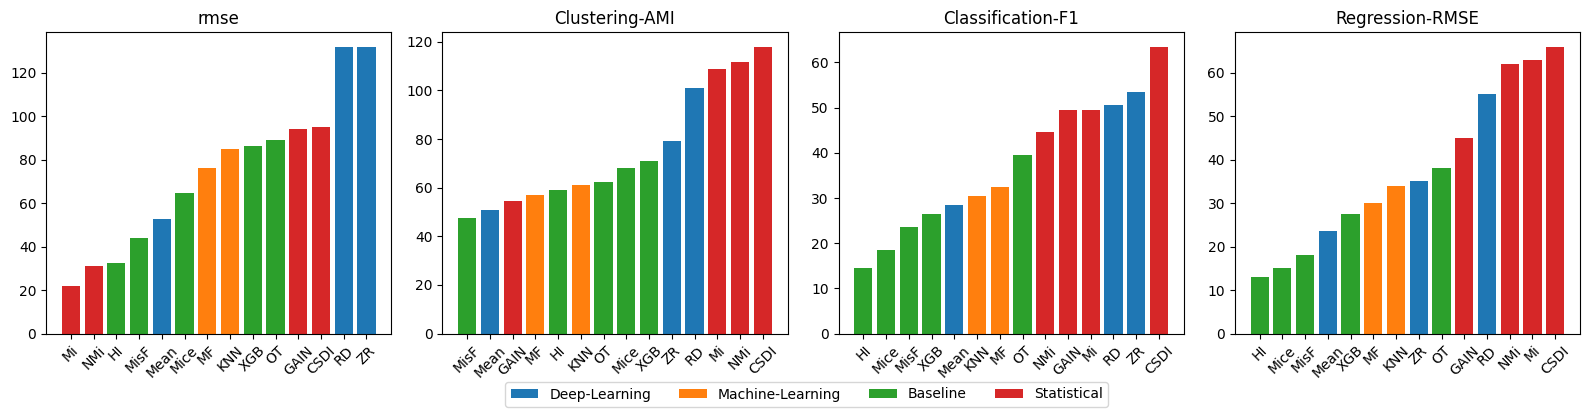

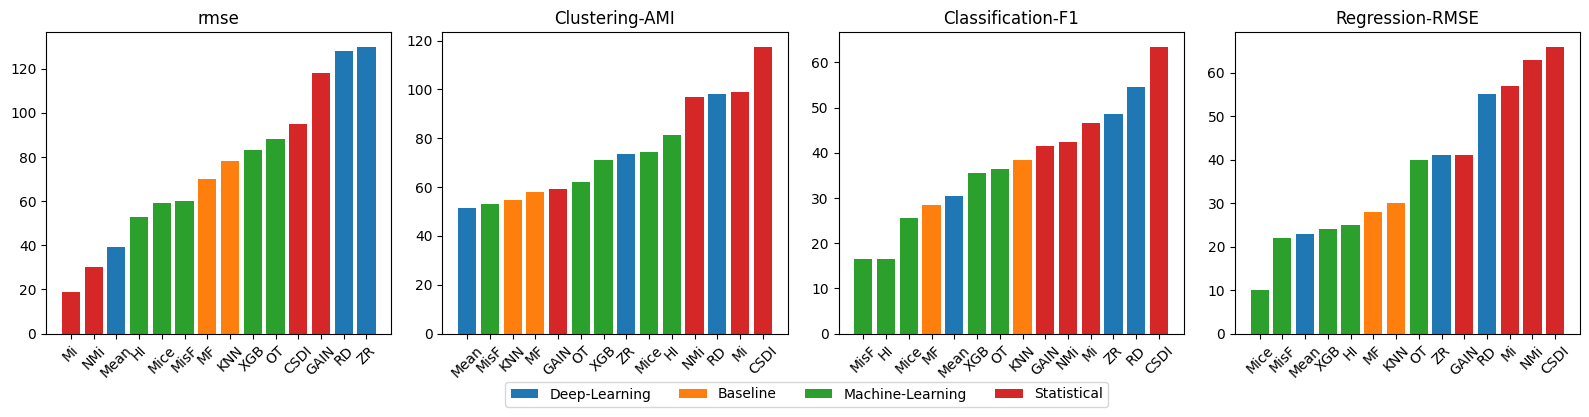

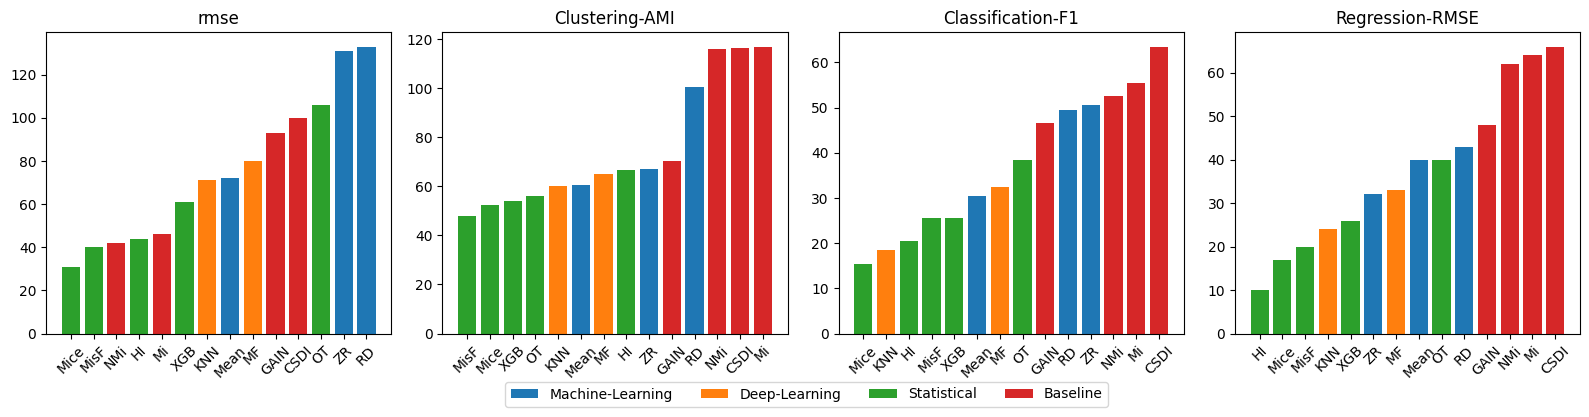

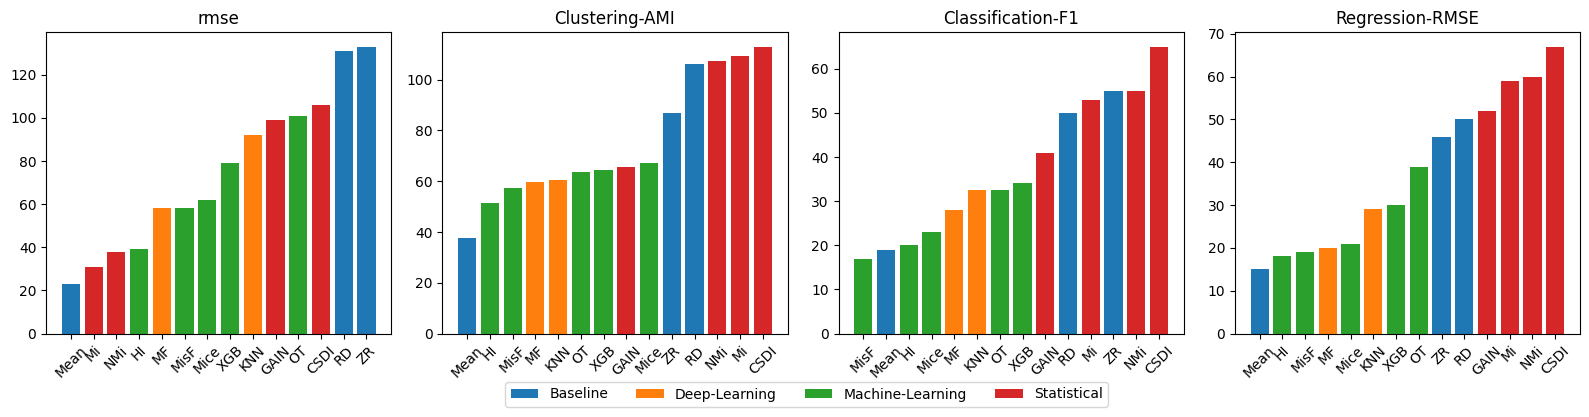

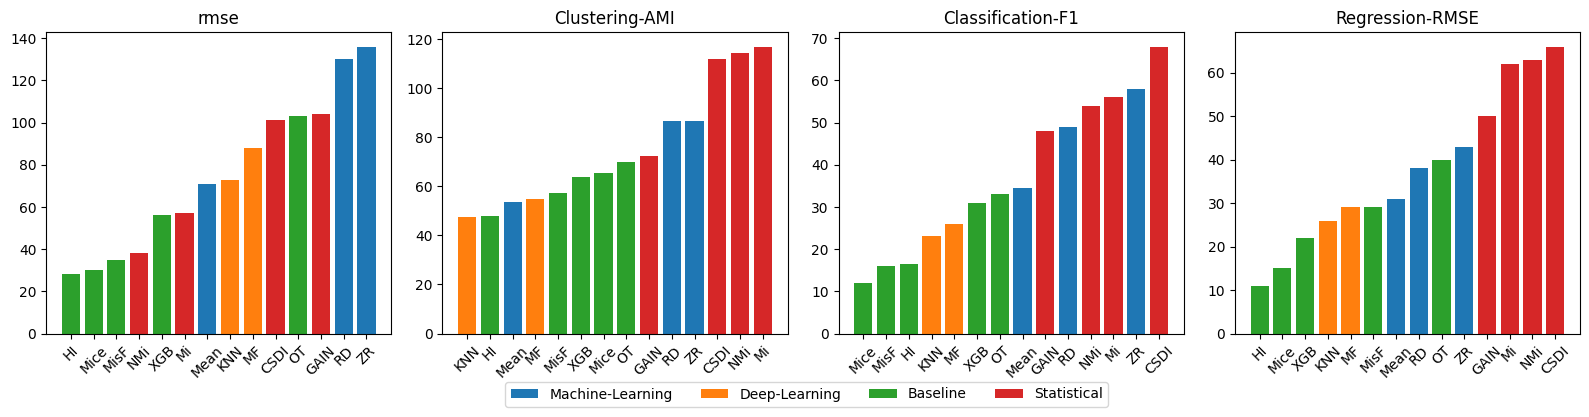

In [219]:
colors = {'Baseline': "#1f77b4", 'Statistical': "#ff7f0e", 'Machine-Learning': "#2ca02c",
          'Deep-Learning': "#d62728", "Others": "#9467bd"}

# Define the desired order of legend labels
legend_order = ['Baseline', 'Statistical', 'Machine-Learning', 'Deep-Learning']

subtitle_list = ["rmse","Clustering-AMI","Classification-F1","Regression-RMSE"]

for missing_type in ["mcar","mar","diffuse","logistic","quantile"]:
#for missing_type in ["mcar","mar"]:
    if missing_type == "quantile":
        missing_list = ["Q1_Q4_0.5","Q2_Q3_0.5","Q2_Q4_0.5"]

    else:
        missing_list = ["0.3","0.5","0.7"]


    for missing_para in missing_list:
        legend_handles = []
        legend_labels = []

        rmse = pd.read_csv(f"../rmse/{missing_type}_{missing_para}_RMSE_test.csv",index_col=0).T
        cluster_AMI = pd.read_csv(f"../clustering/{missing_type}/{missing_para}_AMI.csv",index_col=0).T
        cluster_V = pd.read_csv(f"../clustering/{missing_type}/{missing_para}_V.csv",index_col=0).T

        ml_clf_f1 = pd.read_csv(f"../ml_new_itft/{missing_type}/{missing_para}_clf_2_f1.csv",index_col=0).T
        ml_reg_rmse = pd.read_csv(f"../ml_new_itft/{missing_type}/{missing_para}_reg_2_rmse.csv",index_col=0).T
    
        ranked_rmse = make_ranking_df(rmse)
        ranked_AMI = make_ranking_df(cluster_AMI,sort_reverse=False)
        ranked_V = make_ranking_df(cluster_V,sort_reverse=False)
        ranked_f1 = make_ranking_df(ml_clf_f1,sort_reverse=False)
        ranked_reg = make_ranking_df(ml_reg_rmse)
  


        fig, axes = plt.subplots(1, 4, figsize=(16, 4))

        df_list = [ranked_rmse,ranked_AMI,ranked_f1,ranked_reg]



        for i in range(len(df_list)):
            df = df_list[i]
            ax = axes[i]
            for index, row in df.iterrows():
                bar = ax.bar(index, row[0], color=colors[row["Group"]], width=0.8)  # Adjust bar width
                # Add legend handles and labels for unique group-color combinations
                if row["Group"] not in legend_labels:
                    legend_handles.append(bar)
                    legend_labels.append(row["Group"])

            #ax.set_ylabel('Mean Rank')
            ax.set_title(f"{subtitle_list[i]}")
            
            ax.tick_params(axis='x', rotation=45
                           )  # Rotate x-axis labels by 60 degrees
        # # Get legend handles and labels for the current subplot
        sorted_handles = [legend_handles[legend_labels.index(label)] for label in legend_order]
        sorted_labels = [label for label in legend_order]

        # Set legend for the current subplot


        fig.legend(sorted_handles, legend_labels, bbox_to_anchor=(0.7, 0.05), ncol=4)

        plt.tight_layout()
        #plt.suptitle(f"Missing Type: {missing_type} Missing Para: {missing_para}", y=1.05,fontsize = 20)
        plt.savefig(f"../saveplot/{missing_type}_{missing_para}.png")
        plt.show()

            

In [187]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define colors for each group
colors = {'Baseline': "#1f77b4", 'Statistical': "#ff7f0e",'Machine-Learning':"#2ca02c",
          'Deep-Learning':"#d62728","Others":"#9467bd"}
# Define the desired order of legend labels
legend_order = ['Baseline', 'Statistical', 'Machine-Learning', 'Deep-Learning']

# Create empty lists to store legend handles and labels
legend_handles = []
legend_labels = []

for missing_mech in ["mcar","mar","diffuse","logistic","quantile"]:

    # Iterate over CSV files
    for csv_file in os.listdir(f"../rmse"):
        data = pd.read_csv(f"../rmse/{csv_file}", index_col=0).T

        ranked_df = make_ranking_df(data)

        plt.figure(figsize=(4, 2))  # Adjust figure size
        for index, row in ranked_df.iterrows():
            bar = plt.bar(index, row[0], color=colors[row["Group"]], width=0.8)  # Adjust bar width
            # Add legend handles and labels for unique group-color combinations
            if row["Group"] not in legend_labels:
                legend_handles.append(bar)
                legend_labels.append(row["Group"])

        # Sort legend handles and labels based on the desired order
        sorted_handles = [legend_handles[legend_labels.index(label)] for label in legend_order]
        sorted_labels = [label for label in legend_order]

        plt.ylabel('Mean Rank')
        plt.title(csv_file)
        plt.xticks(rotation=60)  # Rotate x-axis labels by 60 degrees
        plt.legend(sorted_handles, sorted_labels)
        plt.show()

In [168]:
def make_ranking_df(data,sort_reverse=True):
    ranked_df = pd.DataFrame(data.rank(ascending = sort_reverse).sum(axis=1).sort_values())
    ranked_df['Group'] = 'Others'
    ranked_df.loc[ranked_df.index.isin(['RD', 'ZR',"Mean"]), 'Group'] = 'Baseline'
    ranked_df.loc[ranked_df.index.isin(['KNN', 'MF']), 'Group'] = 'Statistical'
    ranked_df.loc[ranked_df.index.isin(['Mice', 'MisF', 'XGB',"HI","OT"]), 'Group'] = 'Machine-Learning'
    ranked_df.loc[ranked_df.index.isin(['GAIN', 'Mi', "NMi", "CSDI"]), 'Group'] = 'Deep-Learning'

    return ranked_df
